In [1]:

using Latexify
using AbstractAlgebra
using GLMakie

In [2]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [3]:
Makie.inline!(true)

true

# DIFFERENTIAL EQUATIONS:

NEW APPLICATIONS

In [4]:
RR = RealField;
RRs, (a, b, r, A, C, I, λ, ϕ, e, t) = polynomial_ring(RR, [:a, :b, :r, :A, :C, :I, :λ, :ϕ, :e, :t])

(Multivariate polynomial ring in 10 variables over floats, AbstractAlgebra.Generic.MPoly{BigFloat}[a, b, r, A, C, I, λ, ϕ, e, t])

In [5]:
Rs, v = polynomial_ring(RRs, :v => (1:2))
RRf, w = polynomial_ring(Rs, :w => (1:2))
RRf, x = polynomial_ring(RRf, :x => (1:2))
RRf, c = polynomial_ring(RRf, :c => (1:2))


(Multivariate polynomial ring in 2 variables over multivariate polynomial ring, AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[c[1], c[2]])

## Solving a System of Differential Equations


This is just a linear equation but it uses a complex matrix meaning the components are functions and derivatives.

In [6]:
x ~ A .* x

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[x[1], x[2]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[A*x[1], A*x[2]]

In [7]:
x ~ RRf[λ 0; 0 λ] * x

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[x[1], x[2]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[λ*x[1], λ*x[2]]

We can computer as system of differencial equations as a sum of producs.

In [8]:
e_power(λ=1, t=1) = e^λ*t

e_power (generic function with 3 methods)

In [9]:
x[1]*(t) ~ c .* e_power()

t*x[1] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[e*c[1], e*c[2]]

In [10]:
c[2] .* RRf[0 ; 1]*e_power(2, 1)

[       0]
[e^2*c[2]]

As inlustrated here is euquations are aprroximate and or equivalent, this way we can computer the Div euations efficiatly

In [11]:
x .* (t) ~ c[1] .* RRf[0 ; 1]*e_power() + c[2] .* RRf[0 ; 1]*e_power(2, 1)

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}[t*x[1], t*x[2]] ~ [0; e*c[1]+e^2*c[2]]

In [12]:
w ~ c[1] .* [1 ; 0] .* e_power() + c[2] .* [1 ; 0] .* e_power()

AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}[w[1], w[2]] ~ AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}}[e*c[1] + e*c[2], 0]

## Complex Eigenvalues

And because this matrix can be computed in a linear way we can also computer in a similiar way the eingenstuffs.

A rotation Matrix.

In [13]:
A = RRf[a -b; b a]

[a   -1.0*b]
[b        a]

$$
\begin{matrix}
r*cos(\phi) & -r*sin(\phi)\\
r*sin(\phi) & r*cos(\phi)
\end{matrix}
$$

The complex eingenvector of this matrix will review that their eingenvalues rotates when we change the ϕ and or the radius.

In [14]:
ϕ = 0

0

the complex matrix will evaluate as is display here.

So we can then create a function where we can generate differents values by change ϕ and radius.

In [15]:
RRf[r*cos(ϕ) -r*sin(ϕ); r*sin(ϕ) r*cos(ϕ)]

[r   0]
[0   r]

In [16]:
f(r=1, ϕ=0) = [r*cos(ϕ) -r*sin(ϕ); r*sin(ϕ) r*cos(ϕ)]

f (generic function with 3 methods)

In [17]:
f(90, 2)

2×2 Matrix{Float64}:
 -37.4532  -81.8368
  81.8368  -37.4532

**If we plot this values we can see how the changes in ϕ and radius rotate in a spiral way the complex matrix A.**

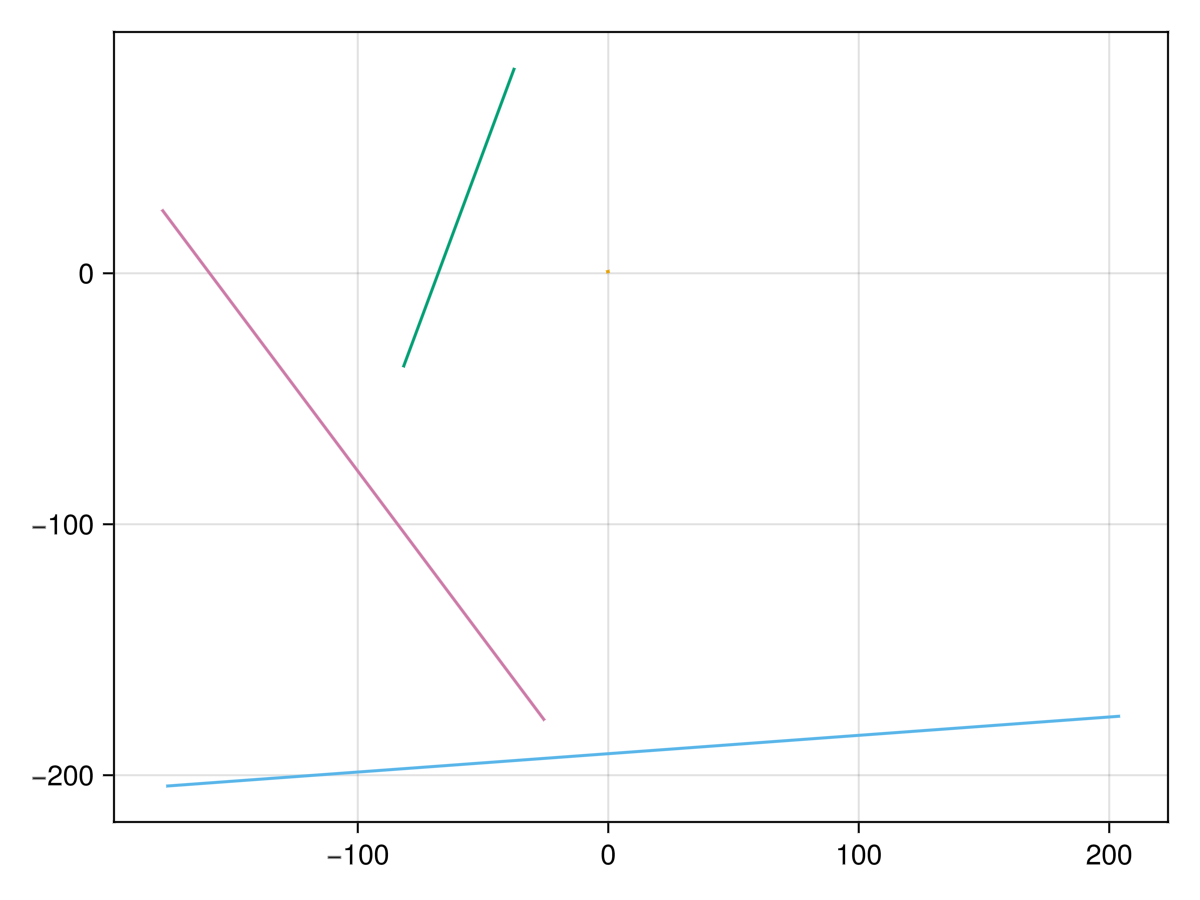

In [24]:
lines(f(0, 0))
lines!(f(1, 1))
lines!(f(90, 2))
lines!(f(180, 3))
lines!(f(270, 4))

current_figure()

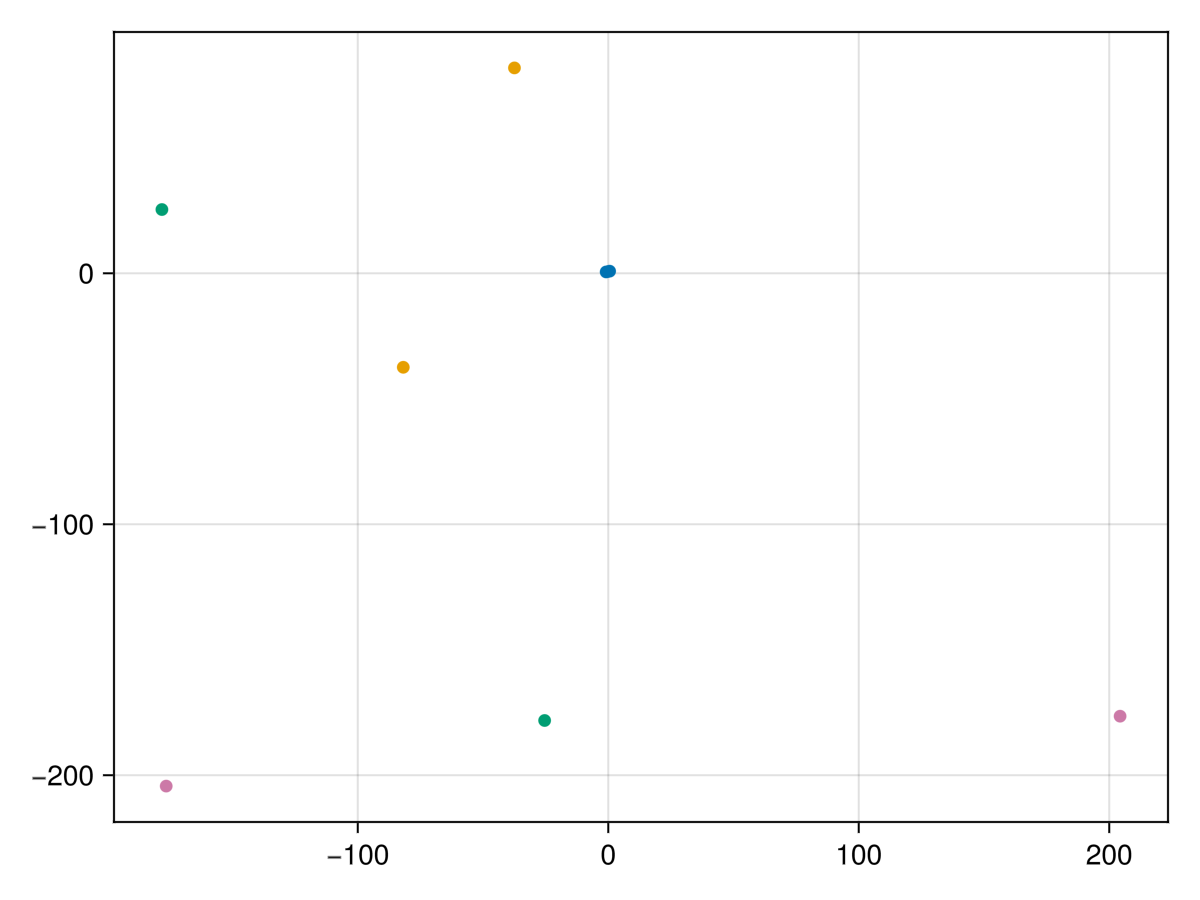

In [19]:
scatter(f(1, 1))
scatter!(f(90, 2))
scatter!(f(180, 3))
scatter!(f(270, 4))

current_figure()

So now that we see that our function generates the desireds values we can interact and generate a data set that show what happen if we have a full circle with 1 radius.

In [53]:
data = map(x -> f(1, x), 1:359)

359-element Vector{Matrix{Float64}}:
 [0.5403023058681398 -0.8414709848078965; 0.8414709848078965 0.5403023058681398]
 [-0.4161468365471424 -0.9092974268256817; 0.9092974268256817 -0.4161468365471424]
 [-0.9899924966004454 -0.1411200080598672; 0.1411200080598672 -0.9899924966004454]
 [-0.6536436208636119 0.7568024953079282; -0.7568024953079282 -0.6536436208636119]
 [0.28366218546322625 0.9589242746631385; -0.9589242746631385 0.28366218546322625]
 [0.960170286650366 0.27941549819892586; -0.27941549819892586 0.960170286650366]
 [0.7539022543433046 -0.6569865987187891; 0.6569865987187891 0.7539022543433046]
 [-0.14550003380861354 -0.9893582466233818; 0.9893582466233818 -0.14550003380861354]
 [-0.9111302618846769 -0.4121184852417566; 0.4121184852417566 -0.9111302618846769]
 [-0.8390715290764524 0.5440211108893698; -0.5440211108893698 -0.8390715290764524]
 ⋮
 [0.6536664338884767 0.7567827912998033; -0.7567827912998033 0.6536664338884767]
 [0.9899882421792622 -0.14114985067939137; 0.14114985

In [54]:
figure = Figure()
ax = Axis(figure[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title")

Axis with 0 plots:


The complex matrix is ploted here creating a complex circle. 

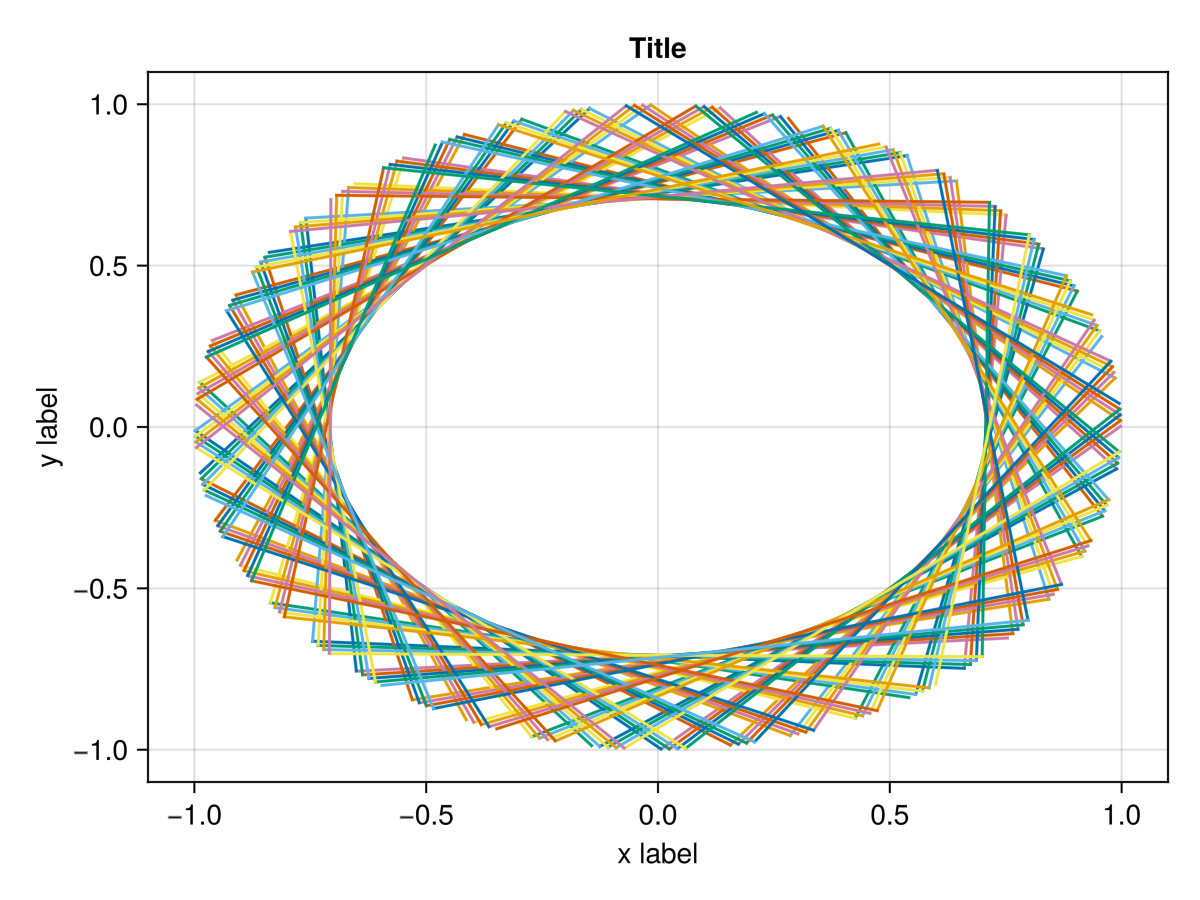

In [55]:
lines(0, 0)
map(x -> lines!(ax, data[x]), 1:180)

figure

By ploting every matrix generated in only 180 we can see the gaps that still create a full circle as we have 359 matrix in our data set.

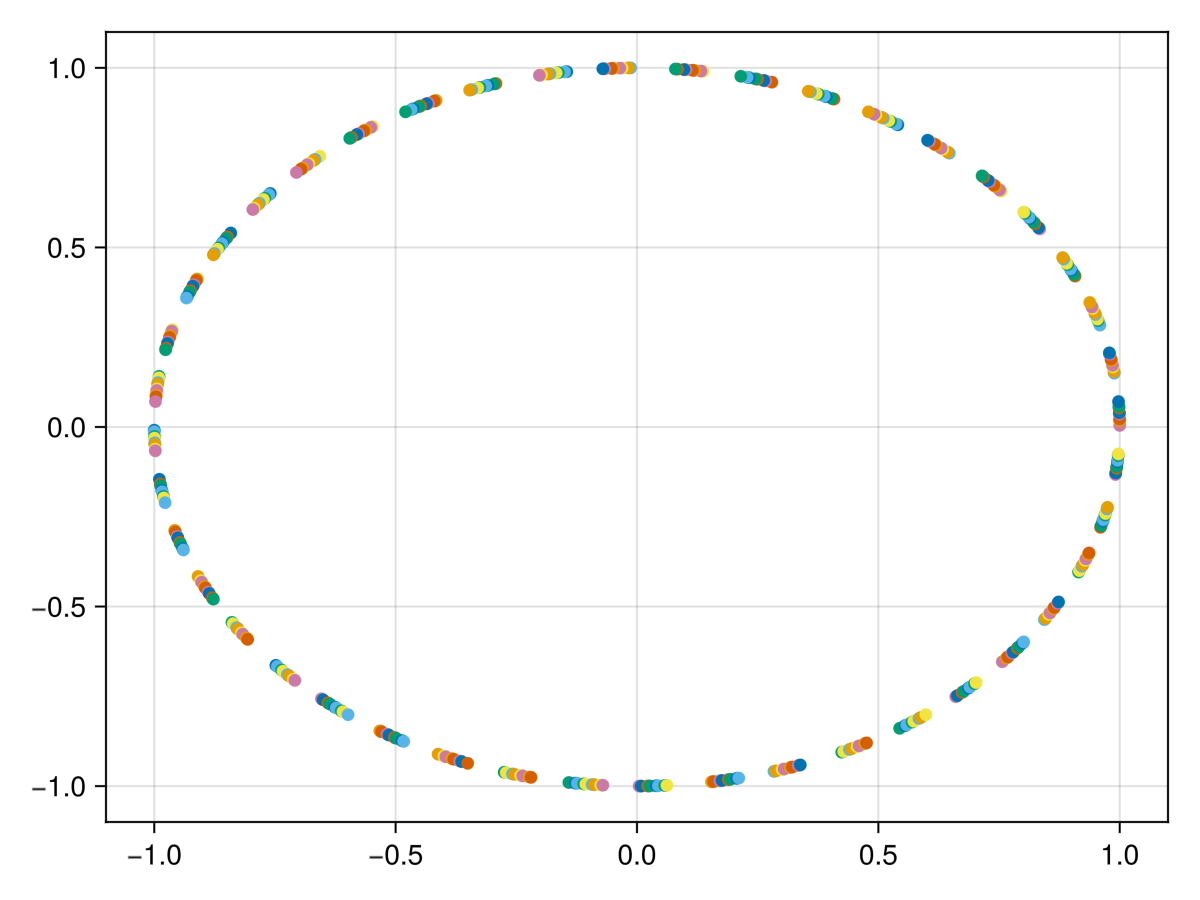

In [56]:
map(x -> scatter!(data[x]), 1:180)

current_figure()

**How can would our data set change if we equaly change the ϕ and radius?**

In [57]:
data = map(x -> f(x, x), 1:359)

359-element Vector{Matrix{Float64}}:
 [0.5403023058681398 -0.8414709848078965; 0.8414709848078965 0.5403023058681398]
 [-0.8322936730942848 -1.8185948536513634; 1.8185948536513634 -0.8322936730942848]
 [-2.9699774898013365 -0.4233600241796016; 0.4233600241796016 -2.9699774898013365]
 [-2.6145744834544478 3.027209981231713; -3.027209981231713 -2.6145744834544478]
 [1.4183109273161312 4.794621373315692; -4.794621373315692 1.4183109273161312]
 [5.761021719902196 1.6764929891935552; -1.6764929891935552 5.761021719902196]
 [5.277315780403132 -4.598906191031523; 4.598906191031523 5.277315780403132]
 [-1.1640002704689083 -7.914865972987054; 7.914865972987054 -1.1640002704689083]
 [-8.200172356962092 -3.7090663671758093; 3.7090663671758093 -8.200172356962092]
 [-8.390715290764524 5.440211108893697; -5.440211108893697 -8.390715290764524]
 ⋮
 [229.4369182948553 265.630759746231; -265.630759746231 229.4369182948553]
 [348.4758612471003 -49.68474743914576; 49.68474743914576 348.4758612471003]
 [14

In [58]:
figure = Figure()
ax = Axis(figure[1, 1], xlabel = "x label", ylabel = "y label",
    title = "Title")

Axis with 0 plots:


Our data show now a spiral of lines given from each matrix.

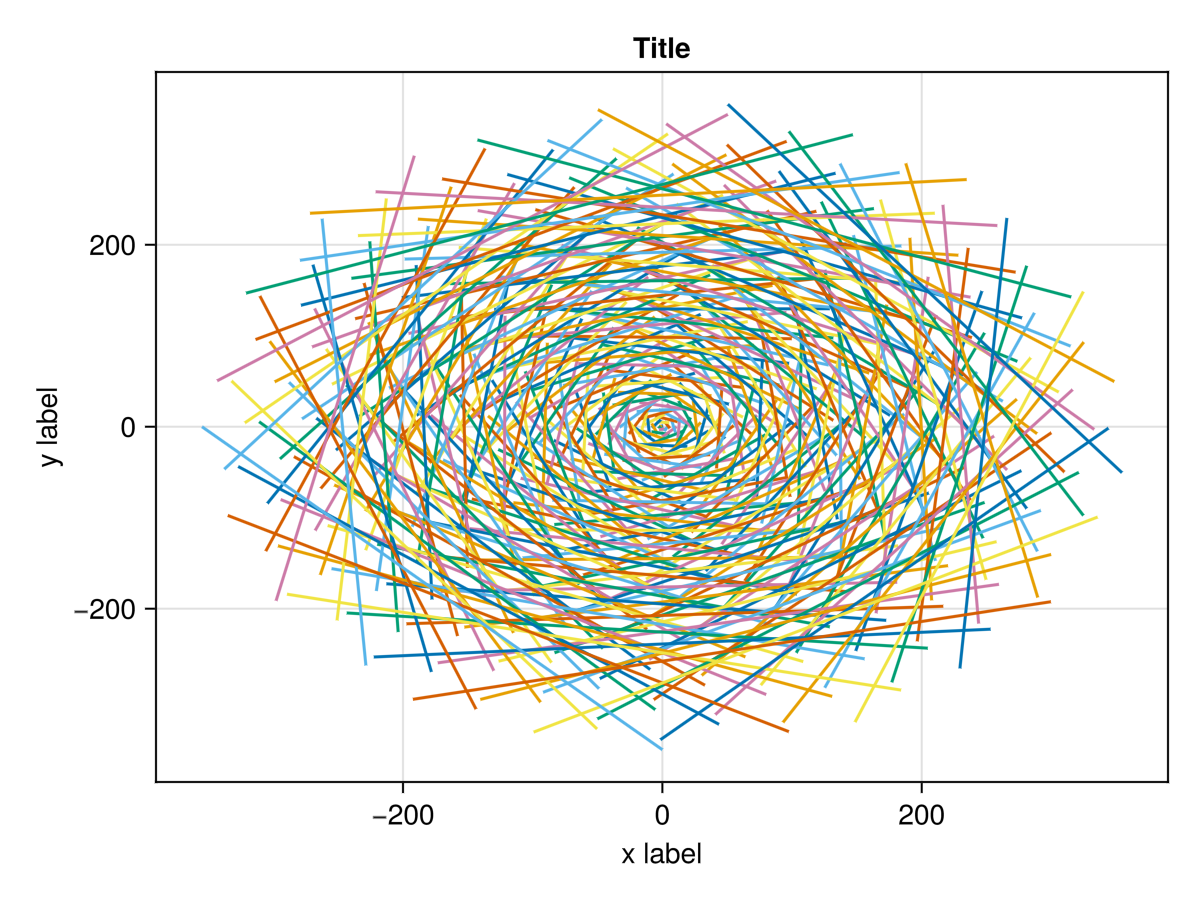

In [59]:
lines(0, 0)
map(x -> lines!(ax, data[x]), 1:359)

figure

And this is how they look like individualy.

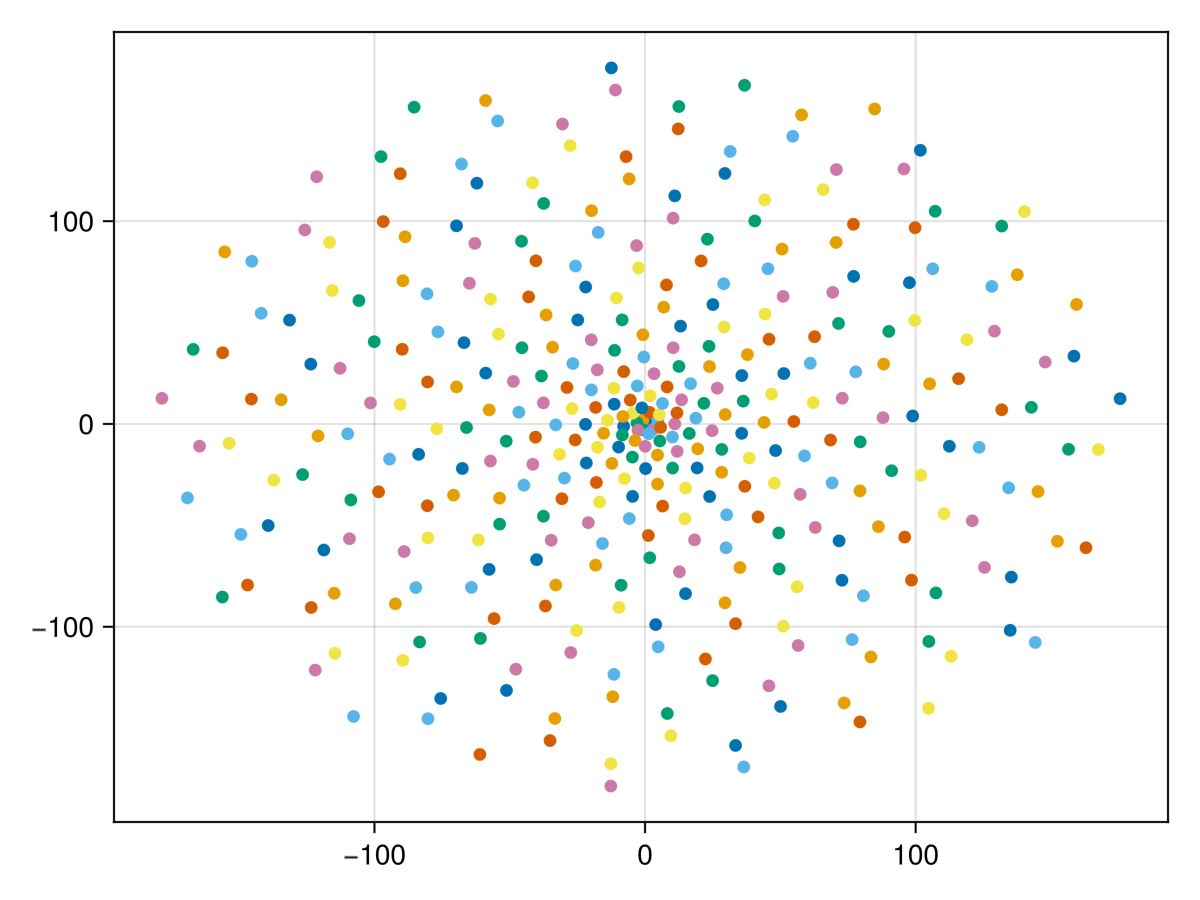

In [60]:
map(x -> scatter!(data[x]), 1:180)

current_figure()

So in conclusion we could see that by computing a differencial equation linear using our understanding of eingenvalues and eingenvectors we can efficiently computer any complex matrix and by vizualizing we came to this beutifull figures!